# NYC Food Supply Gap Analysis - Presentation Visualizations

This notebook contains geographic visualizations for the presentation, organized by section.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely import wkt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import warnings
warnings.filterwarnings('ignore')

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [46]:
# Configuration
CRS_LATLON = "EPSG:4326"
CRS_PROJECTED = "EPSG:6539"

# File paths
CENSUS_TRACTS_GEOJSON = "raw/census_tracts.geojson"
PANTRIES_GEO = "data/geo/pantries.geojson"
NTA_GEO = "data/geo/nta_with_metrics.geojson"
NTA_TABLE = "data/model/nta_table.csv"
PANTRIES_TABLE = "data/model/pantries_table_new.csv"

In [47]:
# Load data
print("Loading data...")
tracts = gpd.read_file(CENSUS_TRACTS_GEOJSON)
pantries_geo = gpd.read_file(PANTRIES_GEO)
nta_geo = gpd.read_file(NTA_GEO)
nta_table = pd.read_csv(NTA_TABLE)
pantries_table = pd.read_csv(PANTRIES_TABLE)

# Ensure same CRS
tracts = tracts.to_crs(CRS_LATLON)
pantries_geo = pantries_geo.to_crs(CRS_LATLON)
nta_geo = nta_geo.to_crs(CRS_LATLON)

print(f"Loaded {len(tracts)} census tracts")
print(f"Loaded {len(nta_geo)} NTAs")
print(f"Loaded {len(pantries_geo)} pantries")

Loading data...
Loaded 2325 census tracts
Loaded 197 NTAs
Loaded 515 pantries


In [16]:
nta_pantries = pantries_table[['nta2020', 'id']]

In [21]:
pantries_geo['id'] = pantries_geo.index

In [30]:
pantries_geo= pd.merge(pantries_geo,nta_pantries,on="id",how="left")

---
# Data Processing Workflow Diagram

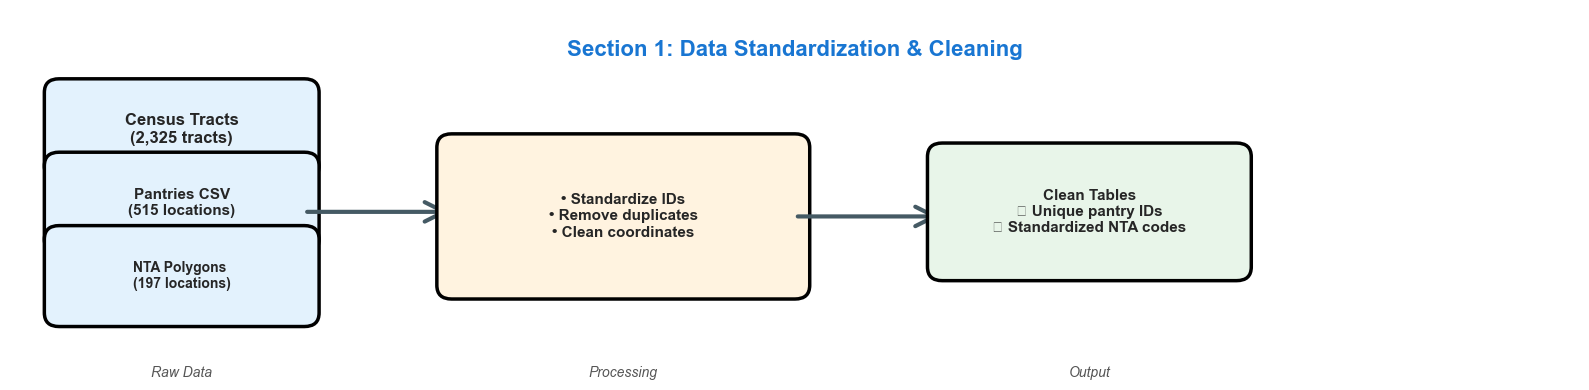

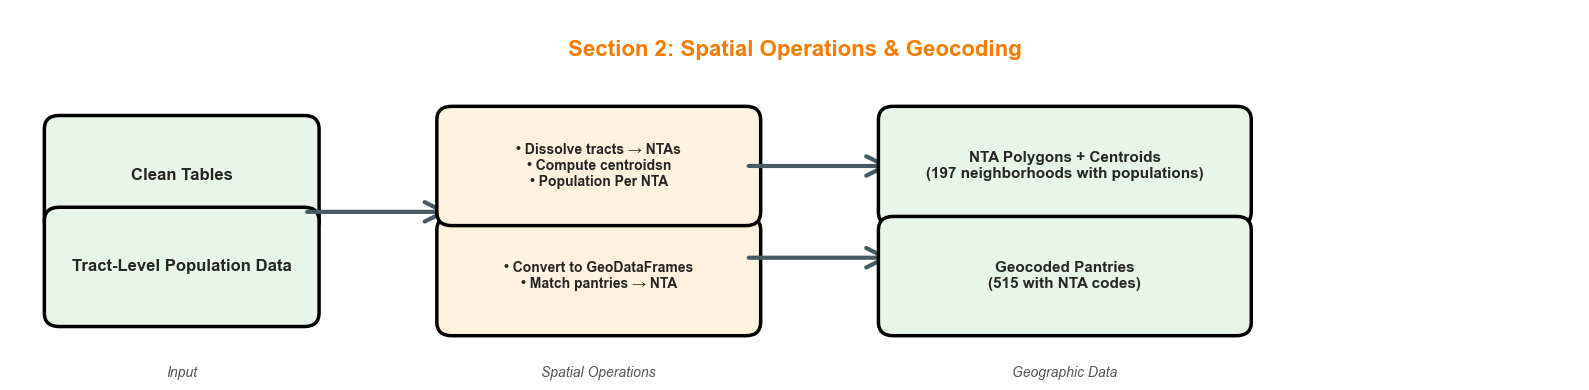

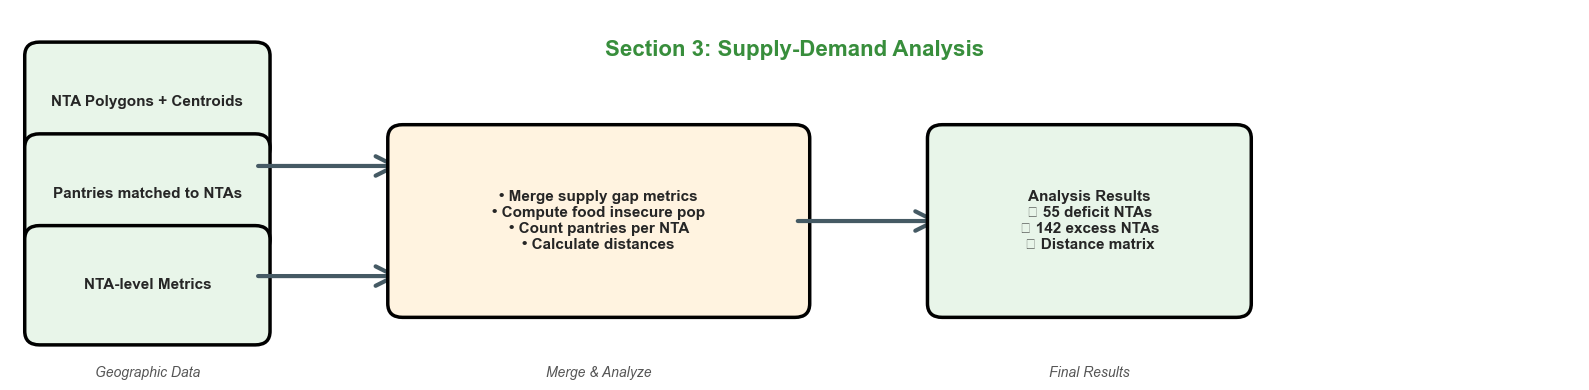


✓ Three simplified workflow diagrams created:
  - visuals/0a_workflow_section1.png (Data Cleaning)
  - visuals/0b_workflow_section2.png (Spatial Operations)
  - visuals/0c_workflow_section3.png (Analysis)

Each diagram corresponds to one section of your presentation!


In [97]:
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch

# Create three separate, simple diagrams - one for each section

# ===== DIAGRAM 1: Section 1 - Data Standardization =====
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_xlim(0, 16)
ax.set_ylim(0, 4)
ax.axis('off')

def draw_simple_box(ax, x, y, width, height, text, color, fontsize=11):
    box = FancyBboxPatch(
        (x, y), width, height,
        boxstyle="round,pad=0.15", 
        facecolor=color,
        edgecolor='black',
        linewidth=2.5
    )
    ax.add_patch(box)
    ax.text(x + width/2, y + height/2, text, 
            ha='center', va='center', fontsize=fontsize, 
            weight='bold', multialignment='center')

def draw_simple_arrow(ax, x1, y1, x2, y2):
    arrow = FancyArrowPatch(
        (x1, y1), (x2, y2),
        arrowstyle='->', 
        mutation_scale=35,
        linewidth=3,
        color='#455A64'
    )
    ax.add_patch(arrow)

ax.text(8, 3.5, 'Section 1: Data Standardization & Cleaning', 
        ha='center', fontsize=16, weight='bold', color='#1976D2')

# Inputs
draw_simple_box(ax, 0.5, 2.3, 2.5, .8, 'Census Tracts\n(2,325 tracts)', '#E3F2FD', 12)
draw_simple_box(ax, 0.5, 1.5, 2.5, 0.8, 'Pantries CSV\n(515 locations)', '#E3F2FD', 11)
draw_simple_box(ax, 0.5, 0.7, 2.5, 0.8, 'NTA Polygons \n(197 locations)', '#E3F2FD', 10)

# Process
draw_simple_arrow(ax, 3, 1.8, 4.5, 1.8)
# draw_simple_arrow(ax, 3, 0.6, 4.5, 0.6)

draw_simple_box(ax, 4.5, 1, 3.5, 1.5, '• Standardize IDs\n• Remove duplicates\n• Clean coordinates', '#FFF3E0', 11)

# Output
draw_simple_arrow(ax, 8, 1.75, 9.5, 1.75)
draw_simple_box(ax, 9.5, 1.2, 3, 1.2, 'Clean Tables\n✓ Unique pantry IDs\n✓ Standardized NTA codes', '#E8F5E9', 11)

# Add labels below
ax.text(1.75, 0, 'Raw Data', ha='center', fontsize=10, style='italic', color='#555')
ax.text(6.25, 0, 'Processing', ha='center', fontsize=10, style='italic', color='#555')
ax.text(11, 0, 'Output', ha='center', fontsize=10, style='italic', color='#555')

plt.tight_layout()
plt.savefig('visuals/0a_workflow_section1.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ===== DIAGRAM 2: Section 2 - Spatial Operations =====
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_xlim(0, 16)
ax.set_ylim(0, 4)
ax.axis('off')

ax.text(8, 3.5, 'Section 2: Spatial Operations & Geocoding', 
        ha='center', fontsize=16, weight='bold', color='#F57C00')

# Inputs
draw_simple_box(ax, 0.5, 1.7, 2.5, 1, 'Clean Tables', '#E8F5E9', 12)
draw_simple_box(ax, 0.5, .7, 2.5, 1, 'Tract-Level Population Data', '#E8F5E9', 12)

# Process
draw_simple_arrow(ax, 3, 1.8, 4.5, 1.8)

draw_simple_box(ax, 4.5, 0.6, 3, 1, '• Convert to GeoDataFrames\n• Match pantries → NTA', '#FFF3E0', 10)
draw_simple_box(ax, 4.5, 1.8, 3, 1, '• Dissolve tracts → NTAs\n• Compute centroidsn\n• Population Per NTA', '#FFF3E0', 10)

# Output
draw_simple_arrow(ax, 7.5, 1.3, 9, 1.3)
draw_simple_arrow(ax, 7.5, 2.3, 9, 2.3)

draw_simple_box(ax, 9, 1.8, 3.5, 1, 'NTA Polygons + Centroids\n(197 neighborhoods with populations)', '#E8F5E9', 11)
draw_simple_box(ax, 9, 0.6, 3.5, 1, 'Geocoded Pantries\n(515 with NTA codes)', '#E8F5E9', 11)

# Add labels
ax.text(1.75, 0, 'Input', ha='center', fontsize=10, style='italic', color='#555')
ax.text(6, 0, 'Spatial Operations', ha='center', fontsize=10, style='italic', color='#555')
ax.text(10.75, 0, 'Geographic Data', ha='center', fontsize=10, style='italic', color='#555')

plt.tight_layout()
plt.savefig('visuals/0b_workflow_section2.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

# ===== DIAGRAM 3: Section 3 - Analysis =====
fig, ax = plt.subplots(figsize=(16, 4))
ax.set_xlim(0, 16)
ax.set_ylim(0, 4)
ax.axis('off')

ax.text(8, 3.5, 'Section 3: Supply-Demand Analysis', 
        ha='center', fontsize=16, weight='bold', color='#388E3C')

# Inputs
draw_simple_box(ax, 0.3, 2.5, 2.2, 1, 'NTA Polygons + Centroids', '#E8F5E9', 11)
draw_simple_box(ax, 0.3, 1.5, 2.2, 1, 'Pantries matched to NTAs', '#E8F5E9', 11)
draw_simple_box(ax, 0.3, 0.5, 2.2, 1, 'NTA-level Metrics', '#E8F5E9', 11)

# Process
draw_simple_arrow(ax, 2.5, 2.3, 4, 2.3)
draw_simple_arrow(ax, 2.5, 1.1, 4, 1.1)

draw_simple_box(ax, 4, 0.8, 4, 1.8, '• Merge supply gap metrics\n• Compute food insecure pop\n• Count pantries per NTA\n• Calculate distances', '#FFF3E0', 11)

# Output
draw_simple_arrow(ax, 8, 1.7, 9.5, 1.7)

draw_simple_box(ax, 9.5, 0.8, 3, 1.8, 'Analysis Results\n✓ 55 deficit NTAs\n✓ 142 excess NTAs\n✓ Distance matrix', '#E8F5E9', 11)

# Add labels
ax.text(1.4, 0, 'Geographic Data', ha='center', fontsize=10, style='italic', color='#555')
ax.text(6, 0, 'Merge & Analyze', ha='center', fontsize=10, style='italic', color='#555')
ax.text(11, 0, 'Final Results', ha='center', fontsize=10, style='italic', color='#555')

plt.tight_layout()
plt.savefig('visuals/0c_workflow_section3.png', dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

print("\n✓ Three simplified workflow diagrams created:")
print("  - visuals/0a_workflow_section1.png (Data Cleaning)")
print("  - visuals/0b_workflow_section2.png (Spatial Operations)")
print("  - visuals/0c_workflow_section3.png (Analysis)")
print("\nEach diagram corresponds to one section of your presentation!")

---
# Section 1: Data Standardization & Cleaning

## Summary Statistics Table

In [5]:
# Get unique boroughs
boroughs = tracts['boroname'].unique()
num_boroughs = len(boroughs[boroughs != None])

summary_stats = pd.DataFrame({
    'Metric': ['Number of Census Tracts', 'Number of NTAs', 'Number of Pantries', 'Number of Boroughs'],
    'Count': [len(tracts), len(nta_geo), len(pantries_geo), num_boroughs]
})

print("\n=== Data Summary Statistics ===")
print(summary_stats.to_string(index=False))


=== Data Summary Statistics ===
                 Metric  Count
Number of Census Tracts   2325
         Number of NTAs    197
     Number of Pantries    515
     Number of Boroughs      5


## 1.1 NTA Boundary Map with Labels

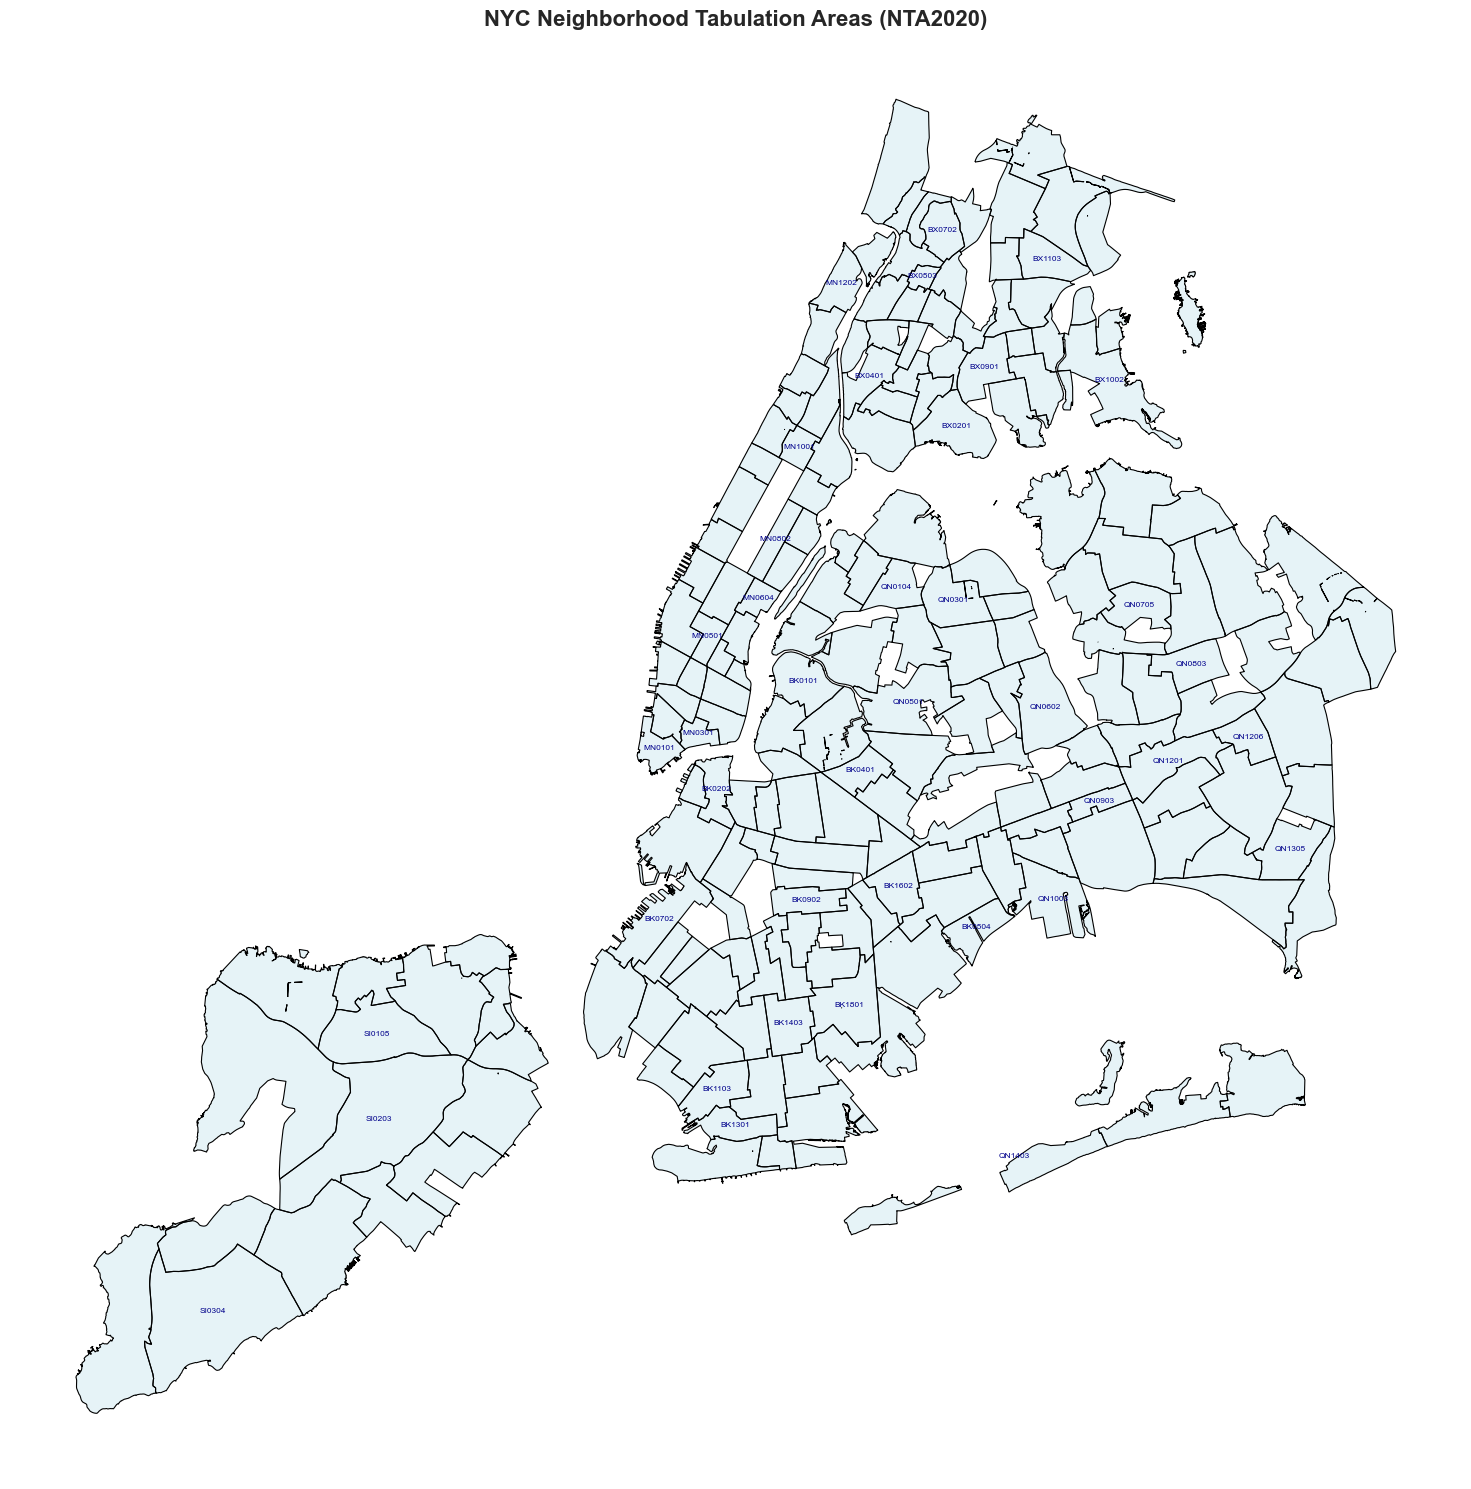

In [6]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot NTA boundaries
nta_geo.boundary.plot(ax=ax, linewidth=0.8, edgecolor='black')
nta_geo.plot(ax=ax, color='lightblue', alpha=0.3)

# Add NTA labels (sample every 5th to avoid overcrowding)
for idx, row in nta_geo.iloc[::5].iterrows():
    centroid = row.geometry.centroid
    ax.annotate(text=row['nta2020'], xy=(centroid.x, centroid.y),
                ha='center', fontsize=6, color='darkblue')

ax.set_title('NYC Neighborhood Tabulation Areas (NTA2020)', fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.savefig('visuals/1_nta_boundaries.png', dpi=300, bbox_inches='tight')
plt.show()

## 1.2 Pantry Location Map

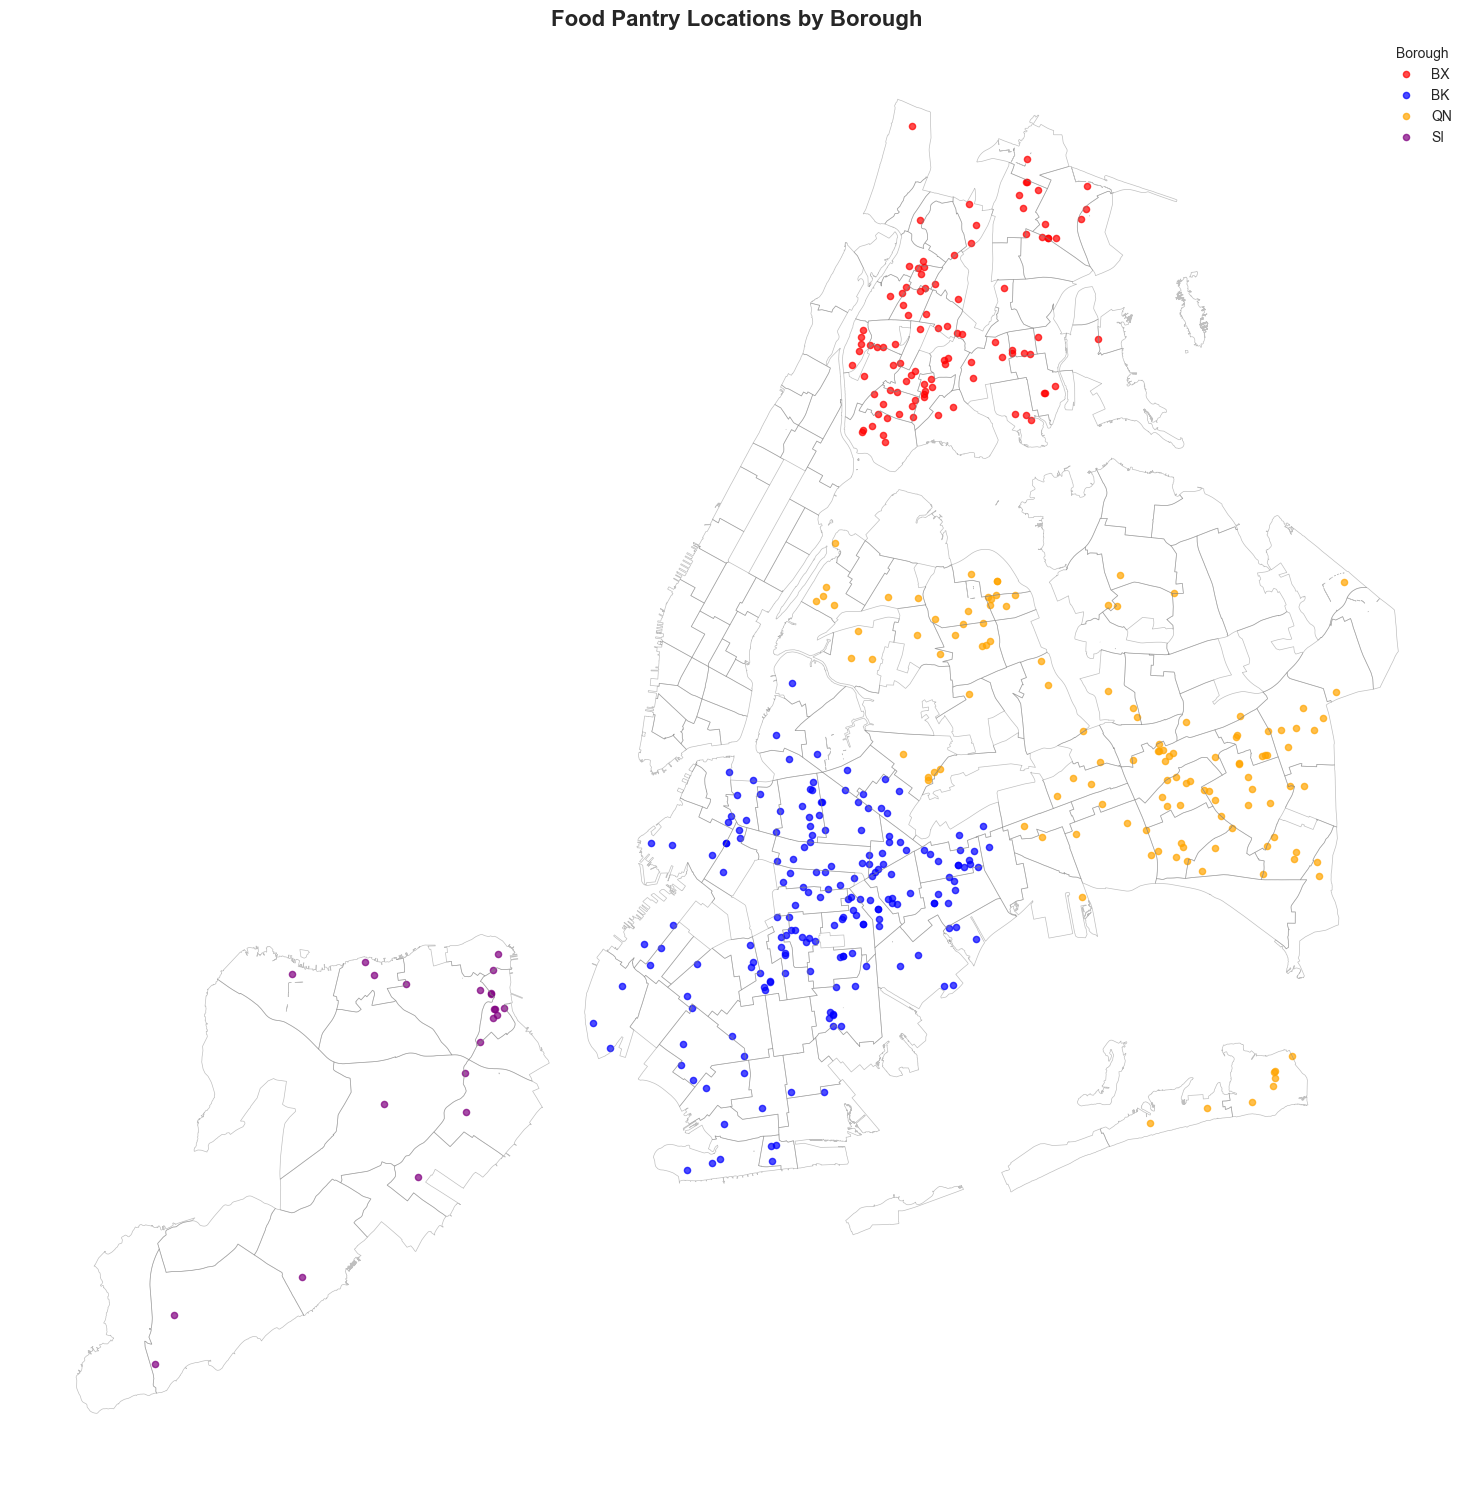


Total pantries: 515

Pantries by borough:
distboro
BK    182
QN    124
BX     99
NY     88
SI     22
Name: count, dtype: int64


In [7]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot NTA boundaries as background
nta_geo.boundary.plot(ax=ax, linewidth=0.5, edgecolor='gray', alpha=0.5)

# Plot pantries by borough
colors = {'BX': 'red', 'BK': 'blue', 'MN': 'green', 'QN': 'orange', 'SI': 'purple'}
for boro, color in colors.items():
    boro_pantries = pantries_geo[pantries_geo['distboro'] == boro]
    if len(boro_pantries) > 0:
        boro_pantries.plot(ax=ax, color=color, markersize=20, alpha=0.7, label=boro)

ax.set_title('Food Pantry Locations by Borough', fontsize=16, fontweight='bold')
ax.legend(title='Borough', loc='upper right')
ax.axis('off')
plt.tight_layout()
plt.savefig('visuals/1_pantry_locations.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nTotal pantries: {len(pantries_geo)}")
print("\nPantries by borough:")
print(pantries_geo['distboro'].value_counts())

---
# Section 2: Spatial Operations & Geocoding

## 2.1 Multi-layer Map: Tracts, NTAs, Pantries, Centroids

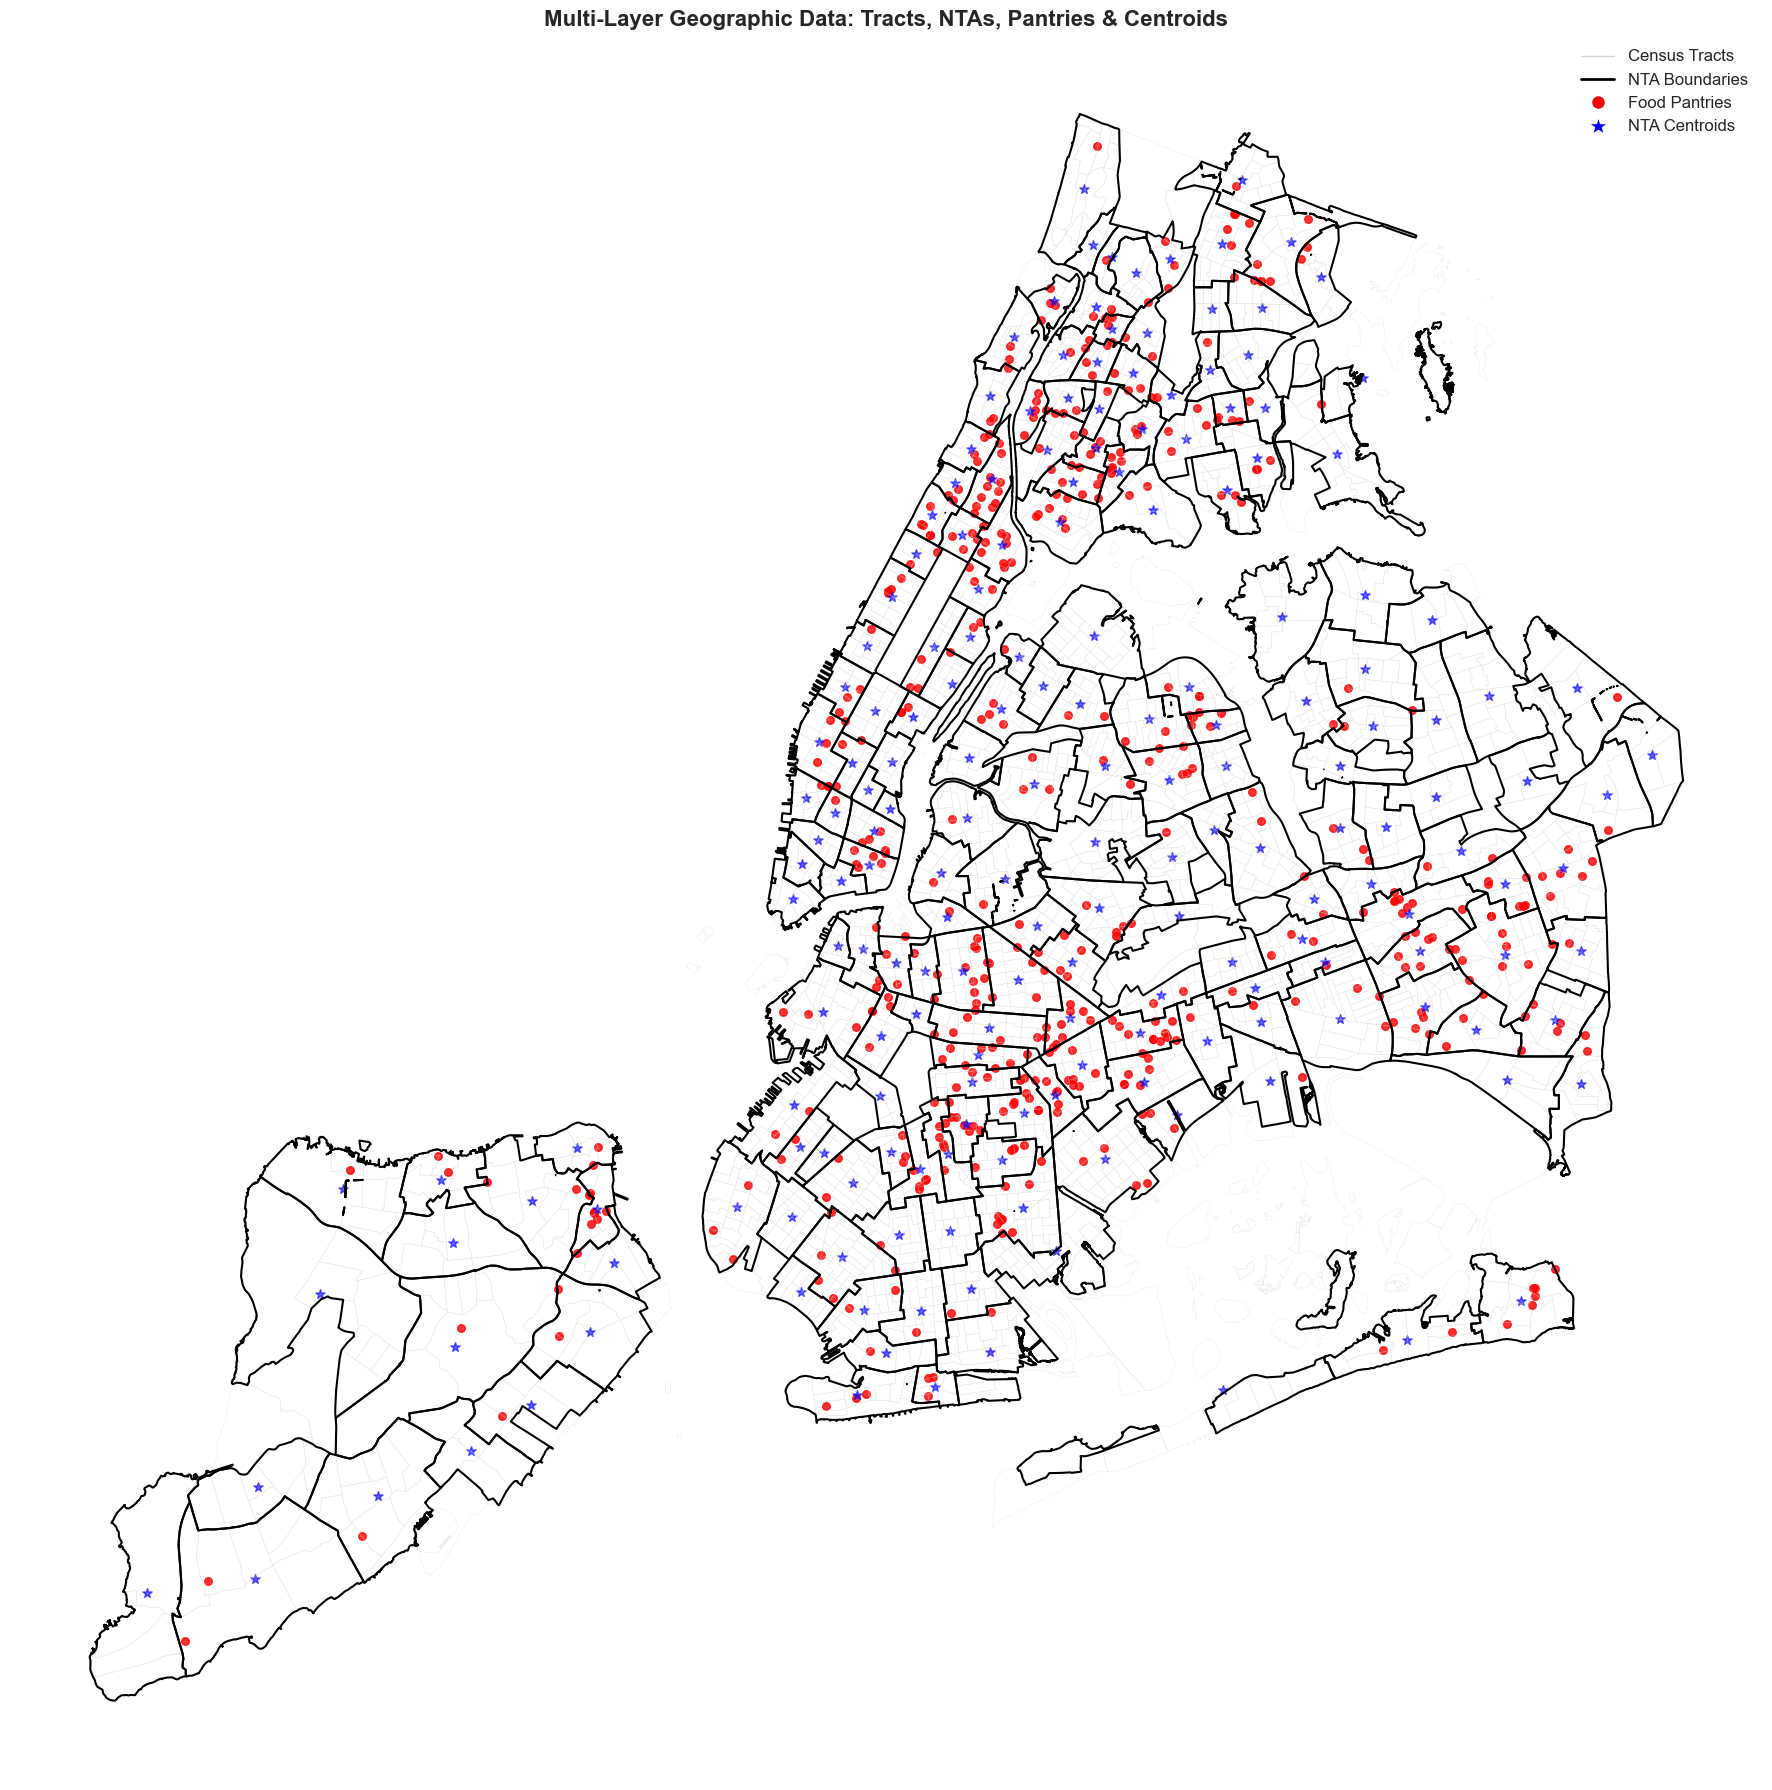

In [8]:
fig, ax = plt.subplots(figsize=(18, 18))

# Layer 1: Census tracts (light gray)
tracts.boundary.plot(ax=ax, linewidth=0.3, edgecolor='lightgray', alpha=0.5, label='Census Tracts')

# Layer 2: NTA polygons (bold outline)
nta_geo.boundary.plot(ax=ax, linewidth=1.5, edgecolor='black', label='NTA Boundaries')

# Layer 3: Pantries (red points)
pantries_geo.plot(ax=ax, color='red', markersize=30, alpha=0.8, label='Food Pantries')

# Layer 4: NTA centroids (blue stars)
nta_centroids.plot(ax=ax, color='blue', marker='*', markersize=50, alpha=0.6, label='NTA Centroids')

# Create custom legend
legend_elements = [
    Line2D([0], [0], color='lightgray', linewidth=1, label='Census Tracts'),
    Line2D([0], [0], color='black', linewidth=2, label='NTA Boundaries'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Food Pantries'),
    Line2D([0], [0], marker='*', color='w', markerfacecolor='blue', markersize=15, label='NTA Centroids')
]
ax.legend(handles=legend_elements, loc='upper right', fontsize=12)

ax.set_title('Multi-Layer Geographic Data: Tracts, NTAs, Pantries & Centroids', 
             fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.savefig('visuals/2_multilayer_map.png', dpi=300, bbox_inches='tight')
plt.show()

## 2.2 Before/After Dissolution: Census Tracts vs NTA Polygons

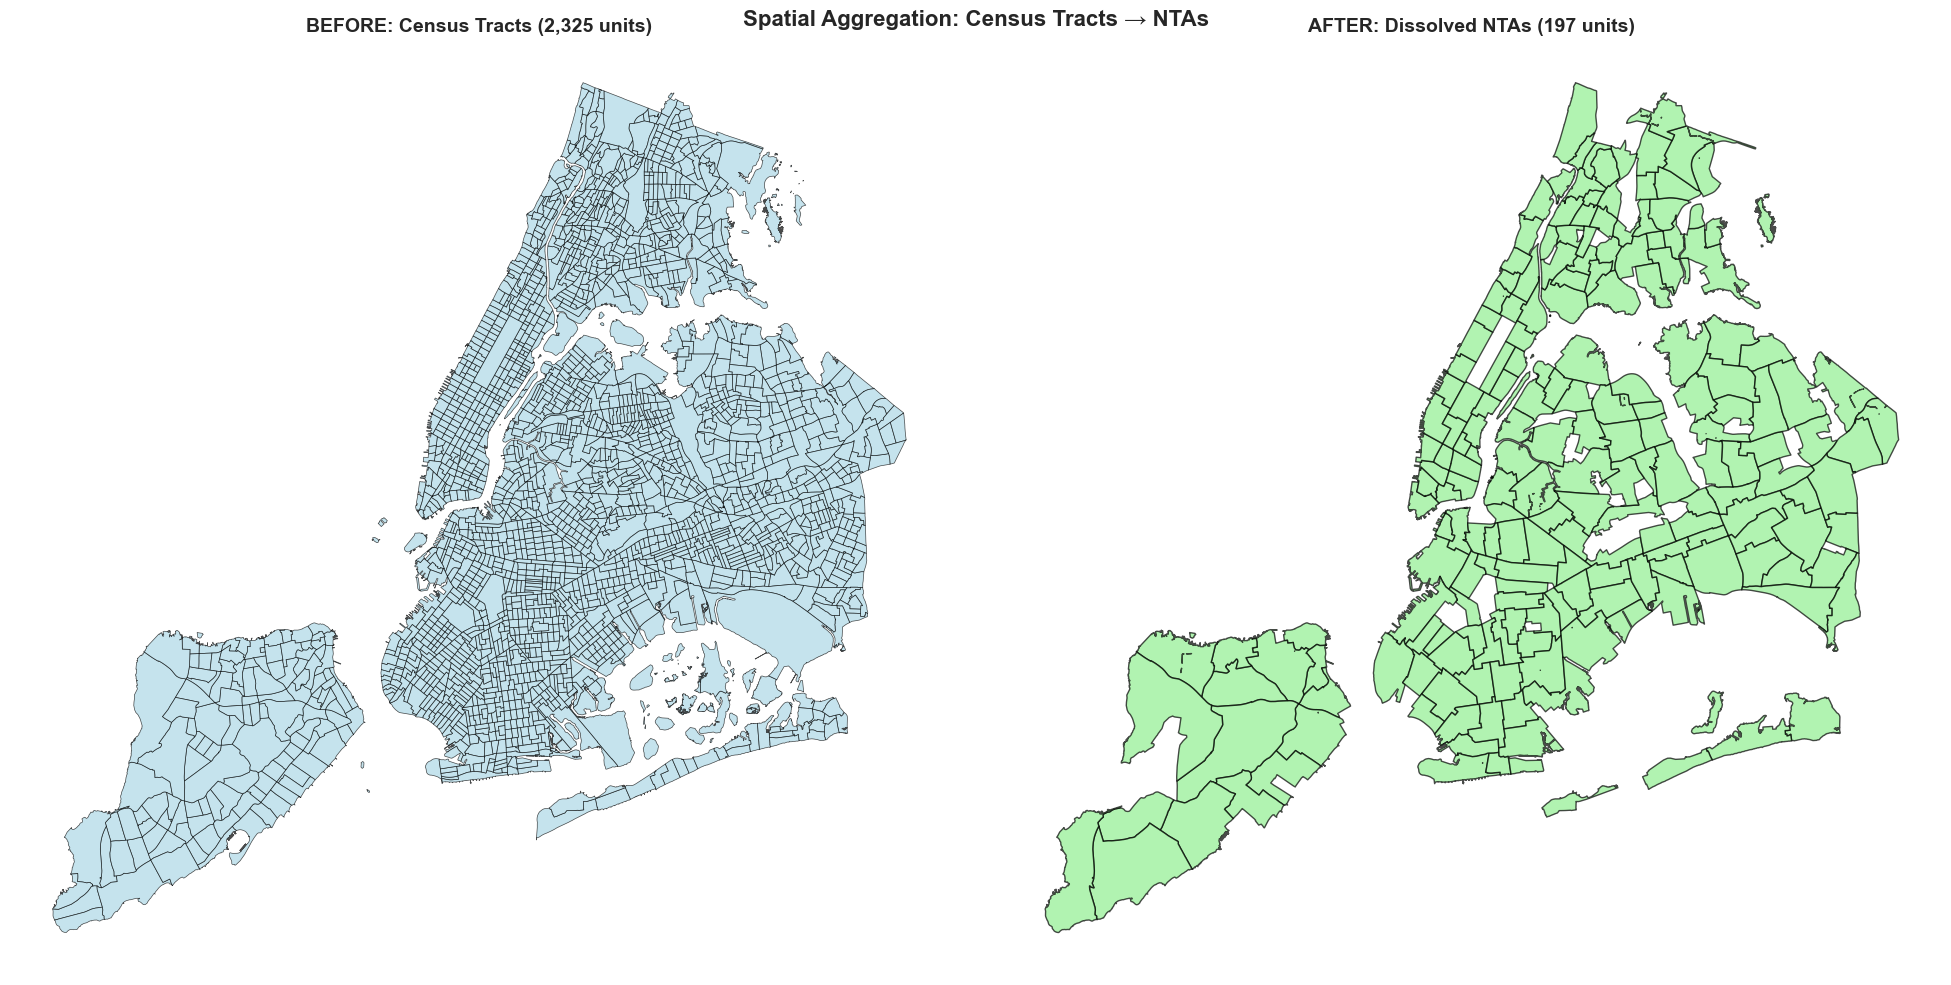

Reduced from 2325 census tracts to 197 NTAs


In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Before: Census tracts
tracts.plot(ax=ax1, color='lightblue', edgecolor='black', linewidth=0.5, alpha=0.7)
ax1.set_title('BEFORE: Census Tracts (2,325 units)', fontsize=14, fontweight='bold')
ax1.axis('off')

# After: NTA polygons
nta_geo.plot(ax=ax2, color='lightgreen', edgecolor='black', linewidth=1, alpha=0.7)
ax2.set_title(f'AFTER: Dissolved NTAs ({len(nta_geo)} units)', fontsize=14, fontweight='bold')
ax2.axis('off')

plt.suptitle('Spatial Aggregation: Census Tracts → NTAs', fontsize=16, fontweight='bold', y=0.98)
plt.tight_layout()
plt.savefig('visuals/2_before_after_dissolution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Reduced from {len(tracts)} census tracts to {len(nta_geo)} NTAs")

## 2.3 Geocoding Success Map

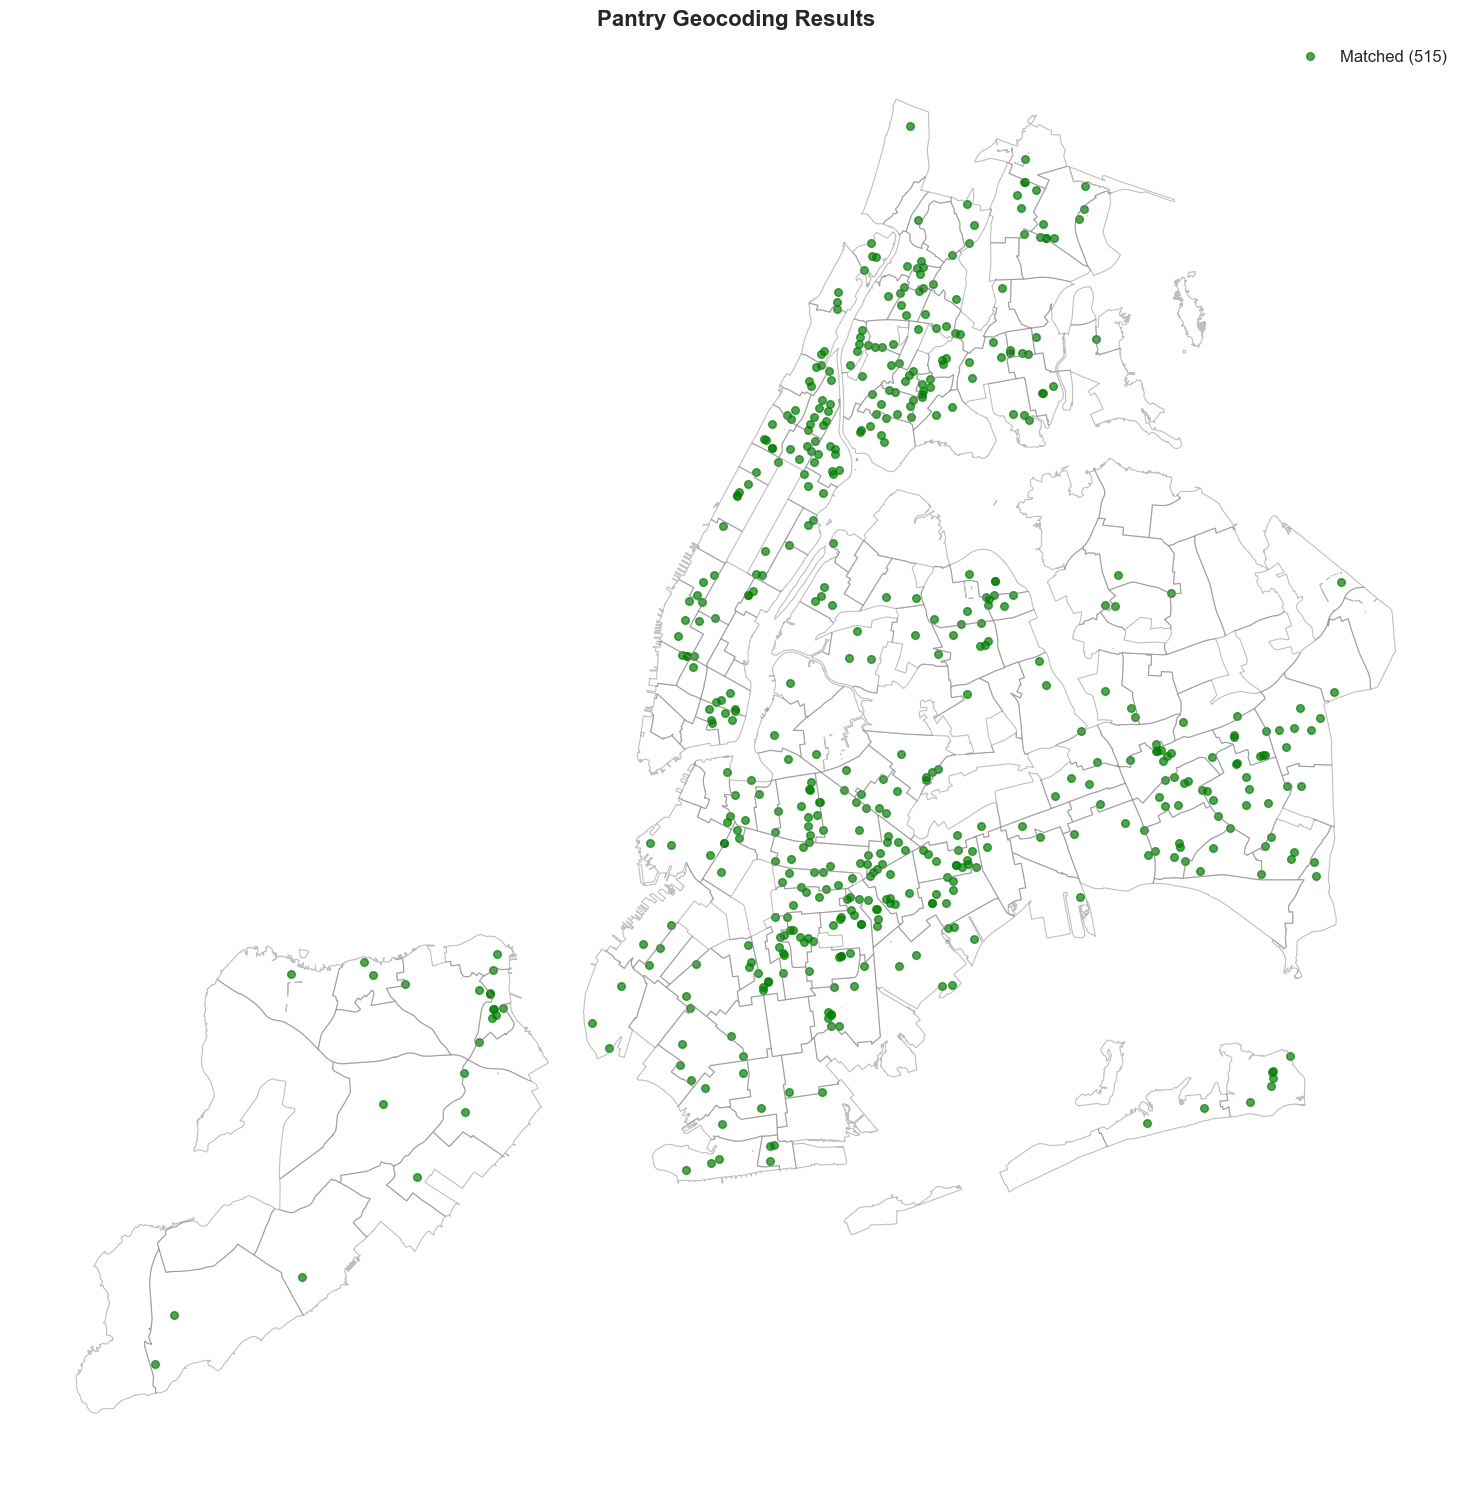


Geocoding Results:
Successfully matched: 515 (100.0%)
Unmatched: 0 (0.0%)


In [31]:
# Check which pantries were successfully matched to NTAs
pantries_geo['matched'] = pantries_geo['nta2020'].notna()

fig, ax = plt.subplots(figsize=(15, 15))

# Plot NTA boundaries
nta_geo.boundary.plot(ax=ax, linewidth=0.8, edgecolor='gray', alpha=0.5)

# Plot matched vs unmatched pantries
matched = pantries_geo[pantries_geo['matched']]
unmatched = pantries_geo[~pantries_geo['matched']]

matched.plot(ax=ax, color='green', markersize=30, alpha=0.7, label=f'Matched ({len(matched)})')
if len(unmatched) > 0:
    unmatched.plot(ax=ax, color='red', markersize=30, alpha=0.7, label=f'Unmatched ({len(unmatched)})')

ax.set_title('Pantry Geocoding Results', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)
ax.axis('off')
plt.tight_layout()
plt.savefig('visuals/2_geocoding_success.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nGeocoding Results:")
print(f"Successfully matched: {len(matched)} ({len(matched)/len(pantries_geo)*100:.1f}%)")
print(f"Unmatched: {len(unmatched)} ({len(unmatched)/len(pantries_geo)*100:.1f}%)")

## Geocoding Summary Table by Borough

In [32]:
geocoding_summary = pantries_geo.groupby('distboro').agg({
    'matched': ['sum', 'count']
}).round(2)

geocoding_summary.columns = ['Matched', 'Total']
geocoding_summary['Match Rate %'] = (geocoding_summary['Matched'] / geocoding_summary['Total'] * 100).round(1)
geocoding_summary = geocoding_summary.reset_index()
geocoding_summary.columns = ['Borough', 'Matched', 'Total', 'Match Rate %']

print("\n=== Geocoding Results by Borough ===")
print(geocoding_summary.to_string(index=False))


=== Geocoding Results by Borough ===
Borough  Matched  Total  Match Rate %
     BK      182    182         100.0
     BX       99     99         100.0
     NY       88     88         100.0
     QN      124    124         100.0
     SI       22     22         100.0


---
# Section 3: Supply-Demand Analysis

## 3.1 Choropleth: Food Insecurity Rate

In [48]:
nta_table_sub= nta_table[['nta2020','Food Insecure Population', 'TotalPop']]

In [49]:
nta_geo = pd.merge(nta_geo, nta_table_sub, on='nta2020', how='left')

In [69]:
nta_geo["Food Insecure Percentage"]= nta_geo["Food Insecure Percentage"].str.strip("%").astype(float)

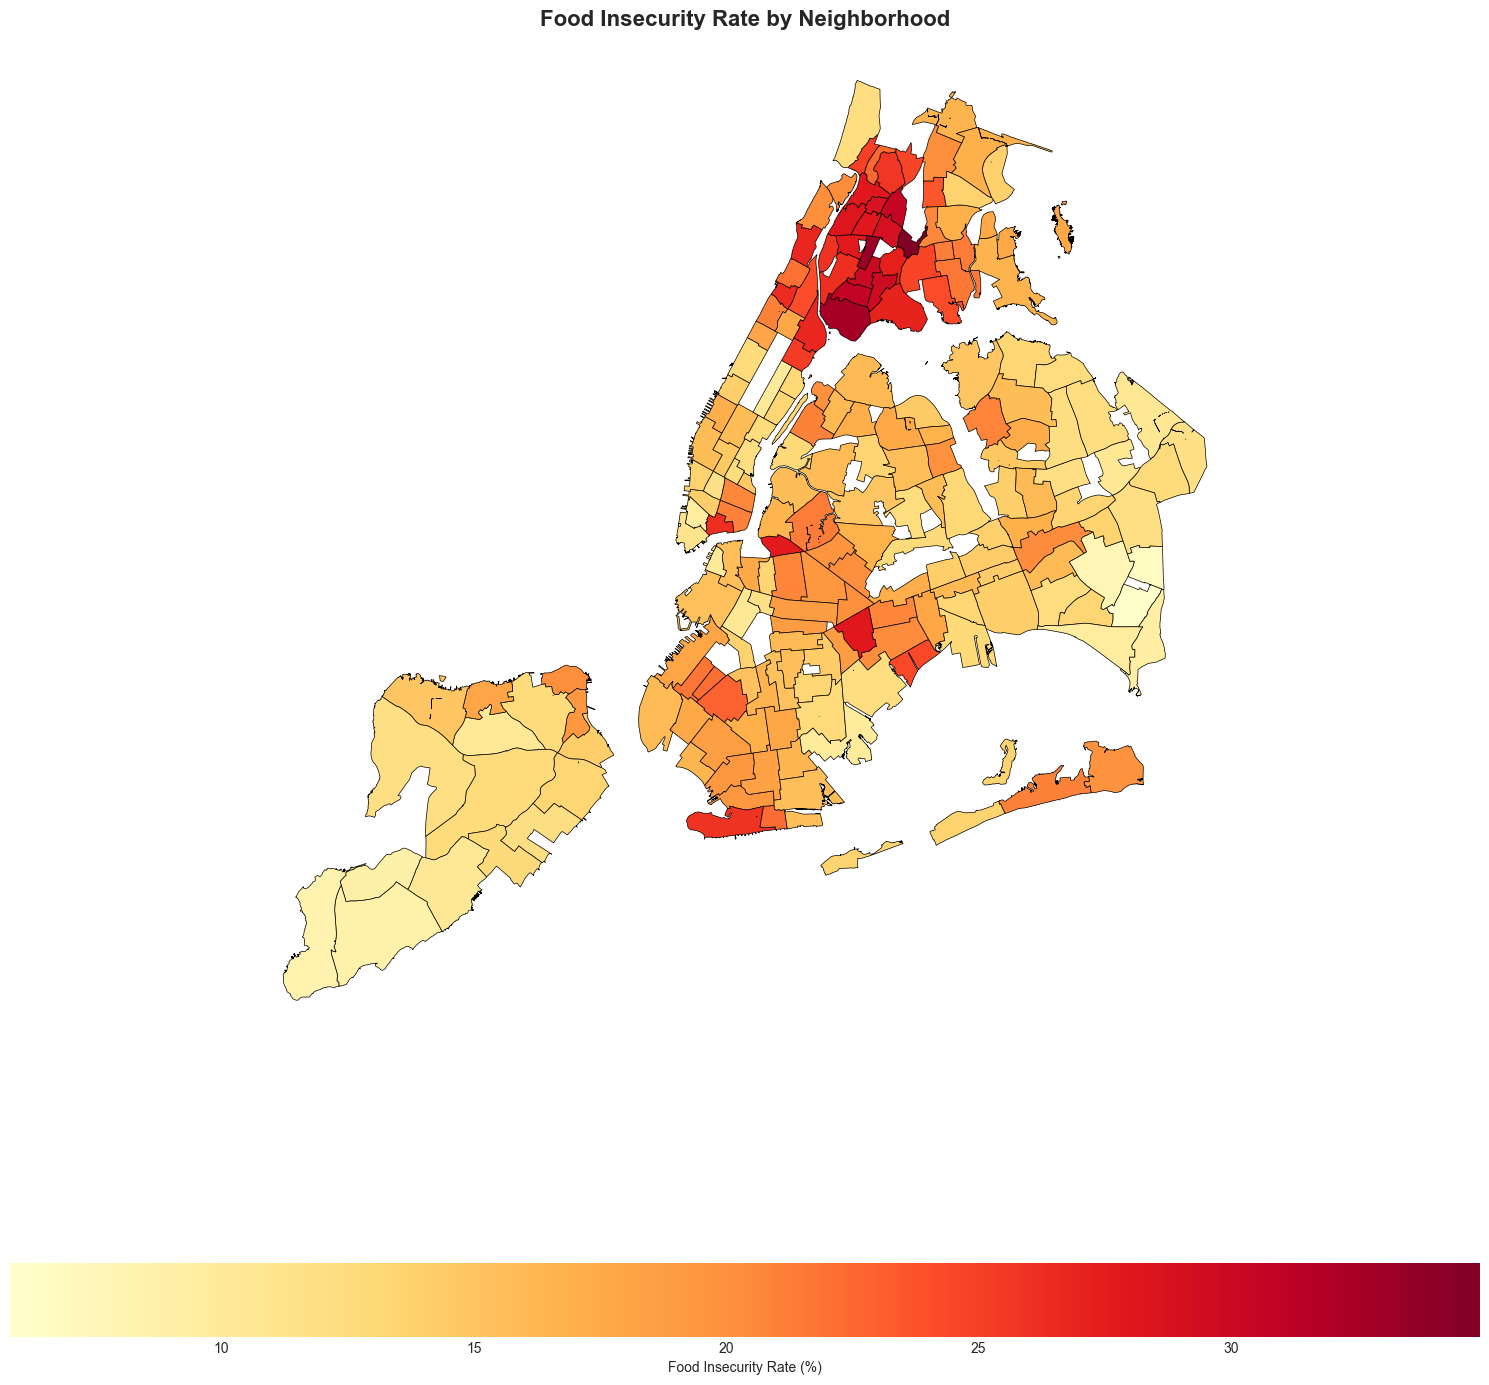


Food Insecurity Statistics:
Mean: 17.51%
Median: 16.30%
Min: 5.81%
Max: 34.94%


In [70]:
fig, ax = plt.subplots(figsize=(15, 15))

# Convert percentage string to float
nta_geo['food_insecure_pct'] = pd.to_numeric(nta_geo['Food Insecure Percentage'], errors='coerce')

# Plot choropleth
nta_geo.plot(column='food_insecure_pct', ax=ax, legend=True, 
             cmap='YlOrRd', edgecolor='black', linewidth=0.5,
             legend_kwds={'label': 'Food Insecurity Rate (%)', 'orientation': 'horizontal'})

ax.set_title('Food Insecurity Rate by Neighborhood', fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.savefig('visuals/3_food_insecurity_choropleth.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nFood Insecurity Statistics:")
print(f"Mean: {nta_geo['food_insecure_pct'].mean():.2f}%")
print(f"Median: {nta_geo['food_insecure_pct'].median():.2f}%")
print(f"Min: {nta_geo['food_insecure_pct'].min():.2f}%")
print(f"Max: {nta_geo['food_insecure_pct'].max():.2f}%")

## 3.2 Choropleth: Supply Gap Classification (Deficit vs Excess)

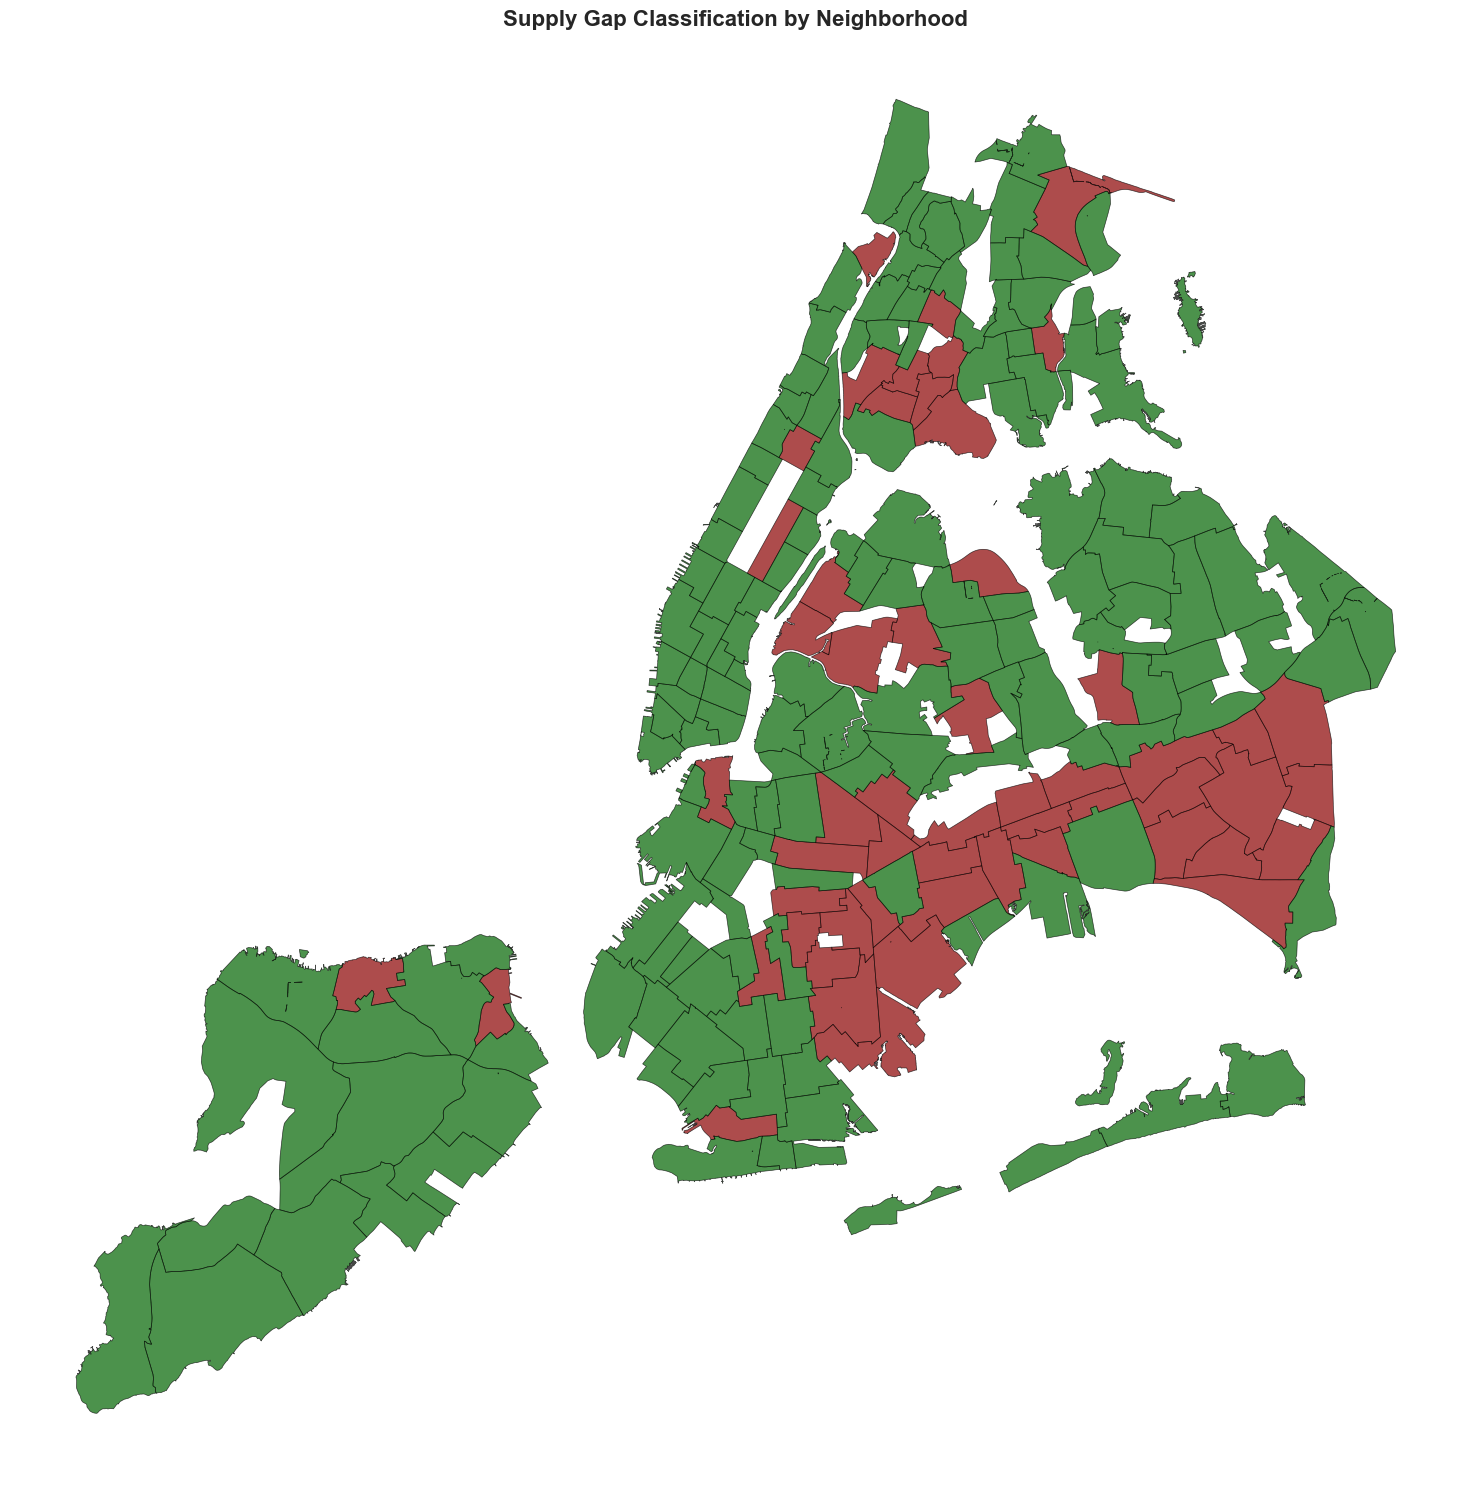


=== Supply Gap Distribution ===
gap_category
Excess     142
Deficit     55
Name: count, dtype: int64


In [53]:
# Clean supply gap column
nta_geo['supply_gap'] = nta_geo['Supply Gap (lbs.)'].str.replace(',', '').astype(float)

# Classify as deficit, excess, or neutral
def classify_gap(gap):
    if pd.isna(gap):
        return 'Unknown'
    elif gap < -100:  # Significant deficit
        return 'Deficit'
    elif gap > 100:   # Significant excess
        return 'Excess'
    else:
        return 'Balanced'

nta_geo['gap_category'] = nta_geo['supply_gap'].apply(classify_gap)

fig, ax = plt.subplots(figsize=(15, 15))

# Define colors
colors = {'Deficit': 'darkred', 'Excess': 'darkgreen', 'Balanced': 'lightgray', 'Unknown': 'white'}

# Plot each category
for category, color in colors.items():
    subset = nta_geo[nta_geo['gap_category'] == category]
    if len(subset) > 0:
        subset.plot(ax=ax, color=color, edgecolor='black', linewidth=0.5, 
                   alpha=0.7, label=f'{category} ({len(subset)})')

ax.set_title('Supply Gap Classification by Neighborhood', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)
ax.axis('off')
plt.tight_layout()
plt.savefig('visuals/3_supply_gap_classification.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Supply Gap Distribution ===")
print(nta_geo['gap_category'].value_counts())

## 3.3 Continuous Supply Gap Choropleth

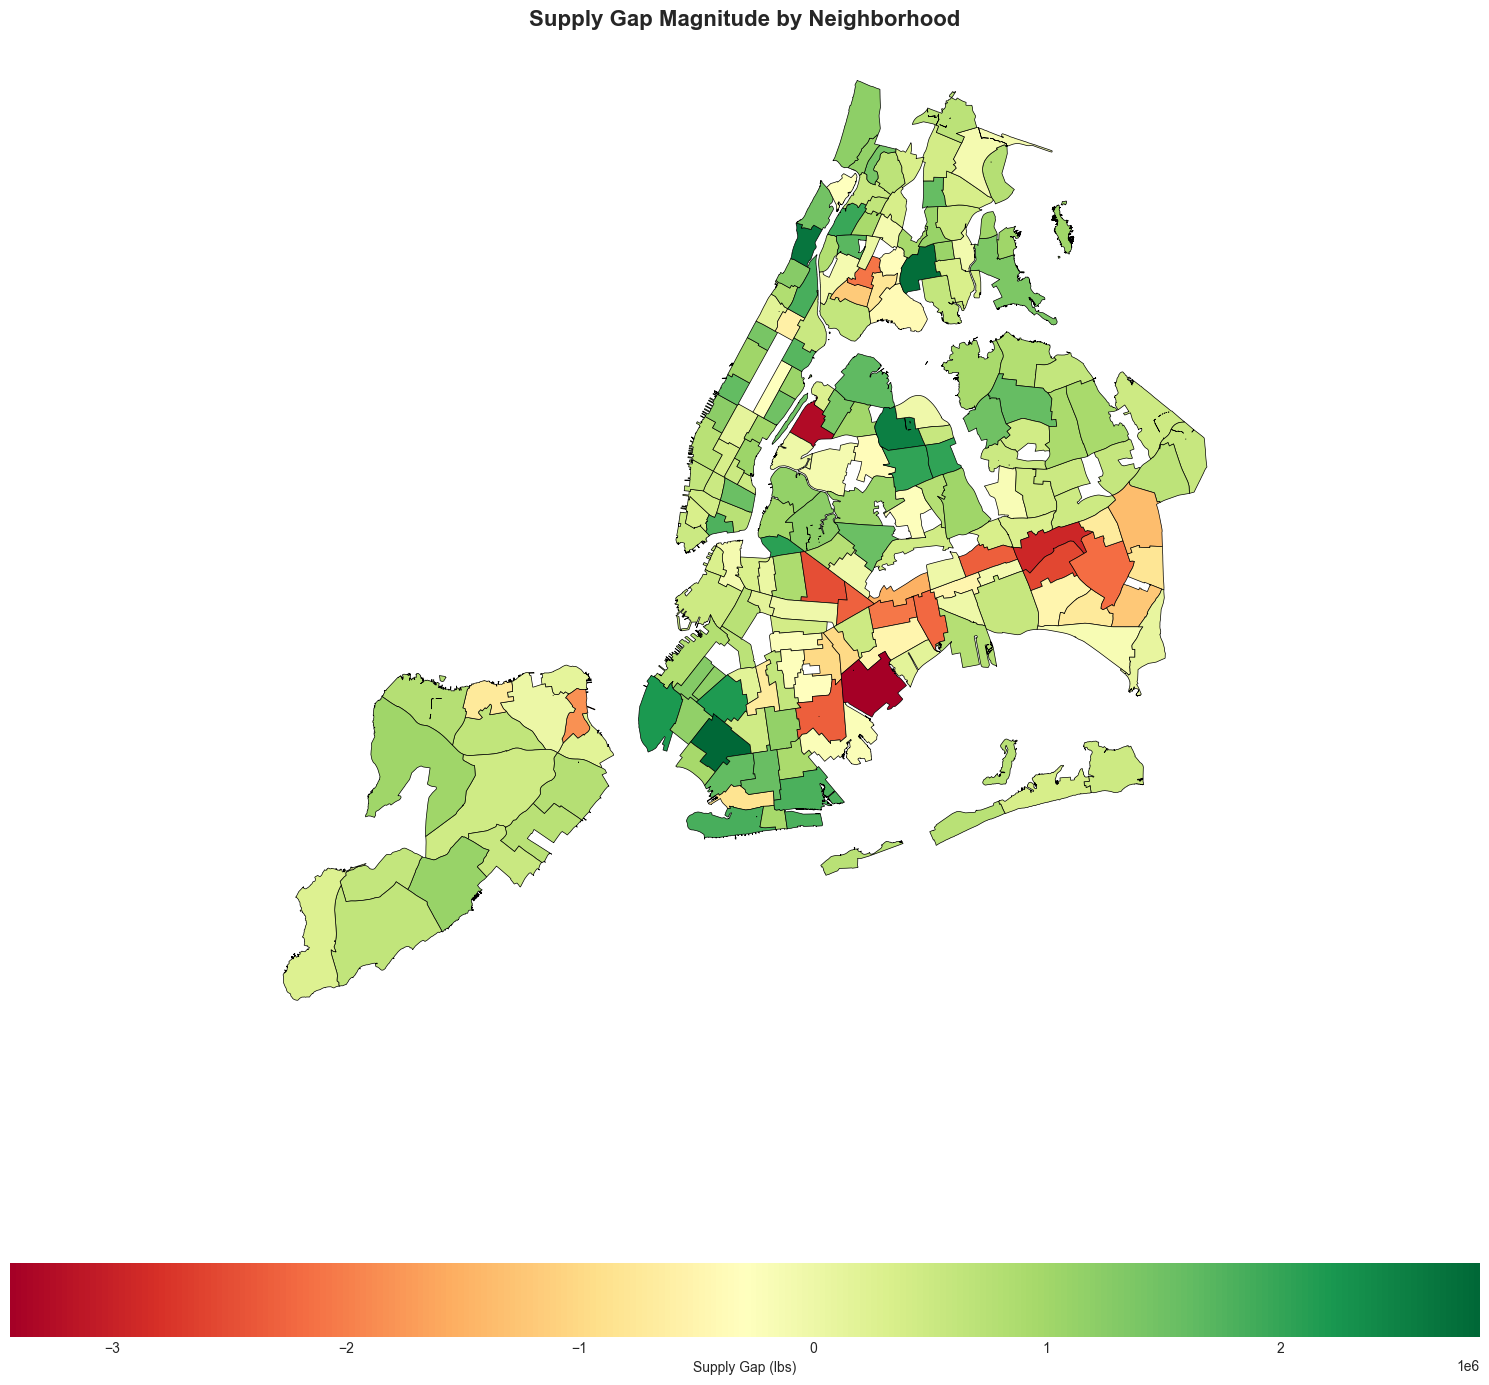

In [54]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot continuous supply gap
nta_geo.plot(column='supply_gap', ax=ax, legend=True, 
             cmap='RdYlGn', edgecolor='black', linewidth=0.5,
             legend_kwds={'label': 'Supply Gap (lbs)', 'orientation': 'horizontal'})

ax.set_title('Supply Gap Magnitude by Neighborhood', fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.savefig('visuals/3_supply_gap_continuous.png', dpi=300, bbox_inches='tight')
plt.show()

## 3.4 Pantries Overlaid on Deficit Areas

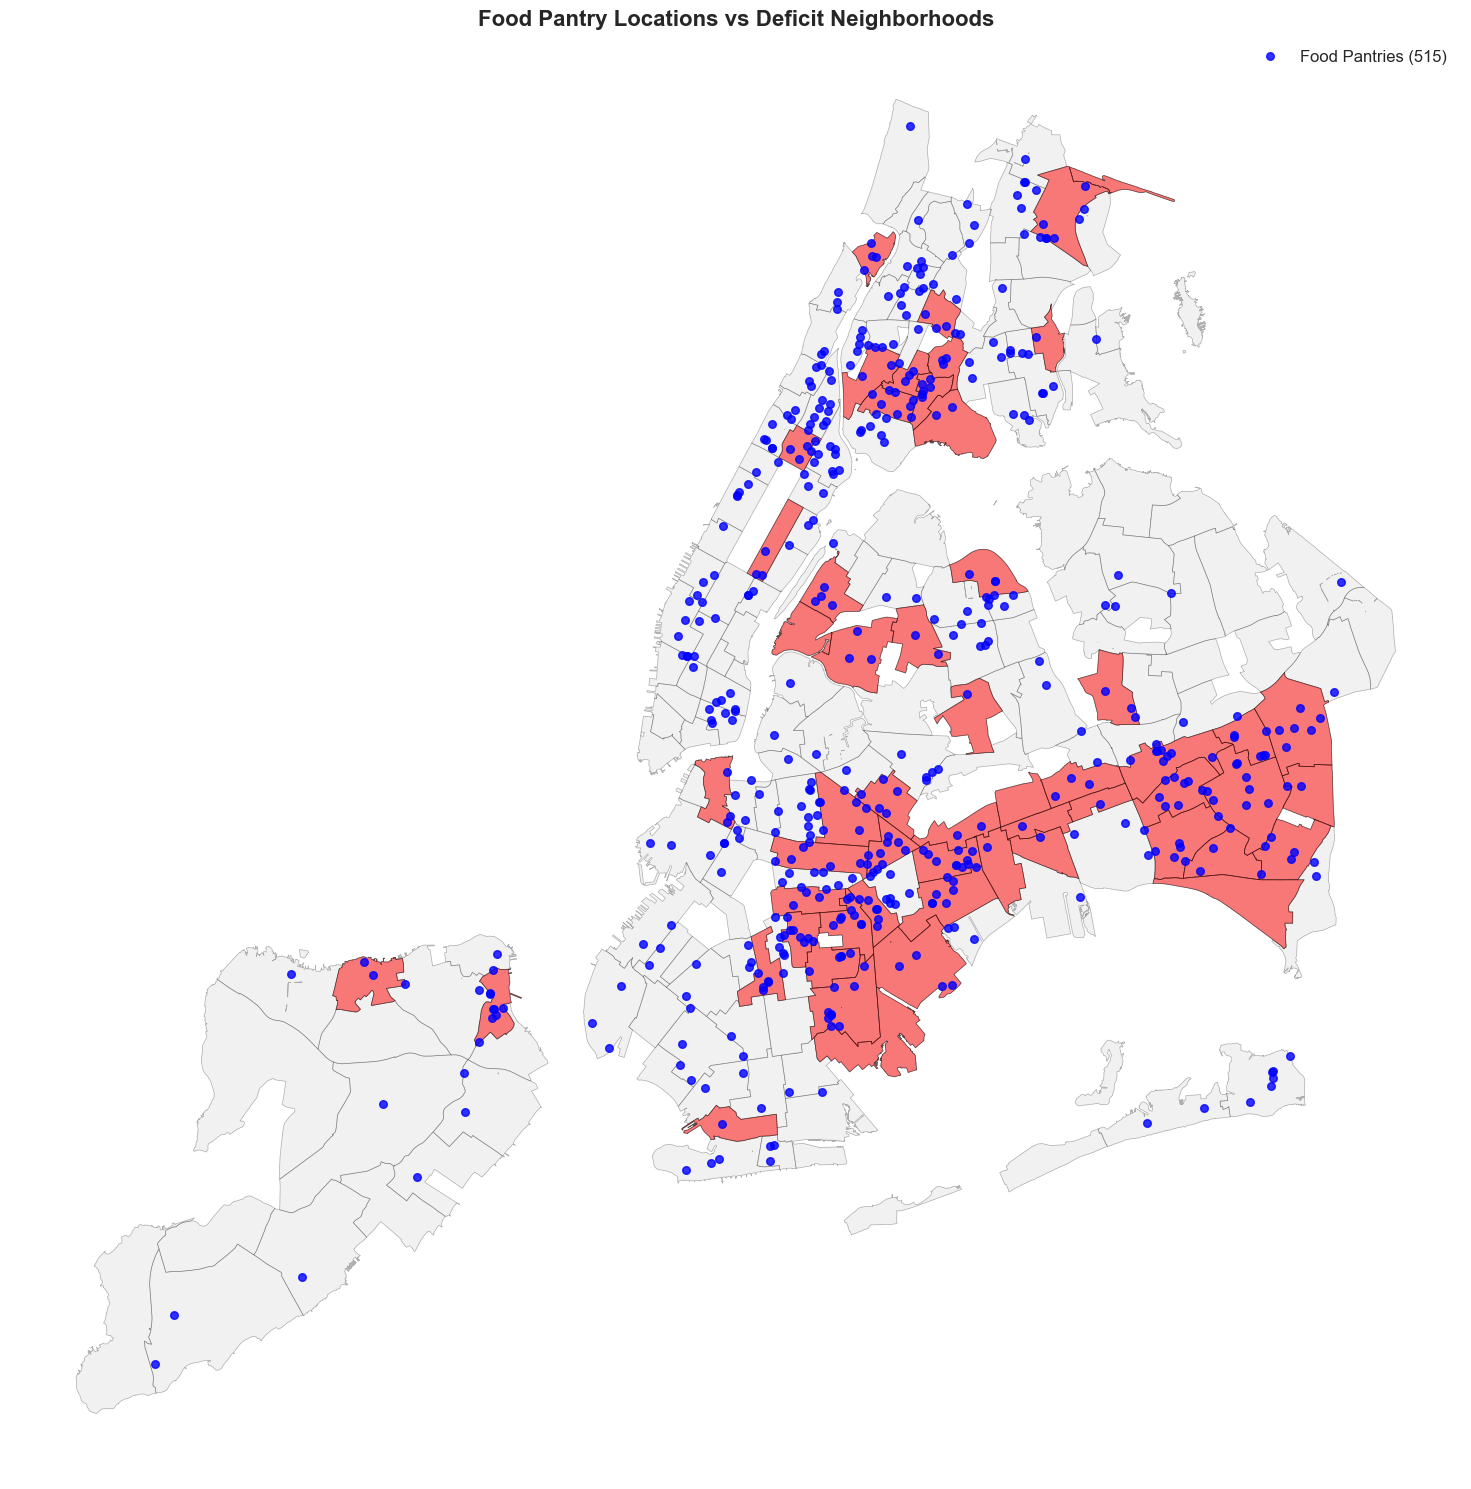


55 neighborhoods have a food supply deficit
515 pantries are available to serve these areas


In [55]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot all NTAs in light gray
nta_geo.plot(ax=ax, color='lightgray', edgecolor='black', linewidth=0.5, alpha=0.3)

# Highlight deficit areas in red
deficit_ntas = nta_geo[nta_geo['gap_category'] == 'Deficit']
deficit_ntas.plot(ax=ax, color='red', edgecolor='black', linewidth=0.5, 
                  alpha=0.5, label=f'Deficit NTAs ({len(deficit_ntas)})')

# Overlay pantries
pantries_geo.plot(ax=ax, color='blue', markersize=30, alpha=0.8, 
                  label=f'Food Pantries ({len(pantries_geo)})')

ax.set_title('Food Pantry Locations vs Deficit Neighborhoods', fontsize=16, fontweight='bold')
ax.legend(loc='upper right', fontsize=12)
ax.axis('off')
plt.tight_layout()
plt.savefig('visuals/3_pantries_deficit_overlay.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\n{len(deficit_ntas)} neighborhoods have a food supply deficit")
print(f"{len(pantries_geo)} pantries are available to serve these areas")

## 3.6 Pantry Count per Neighborhood

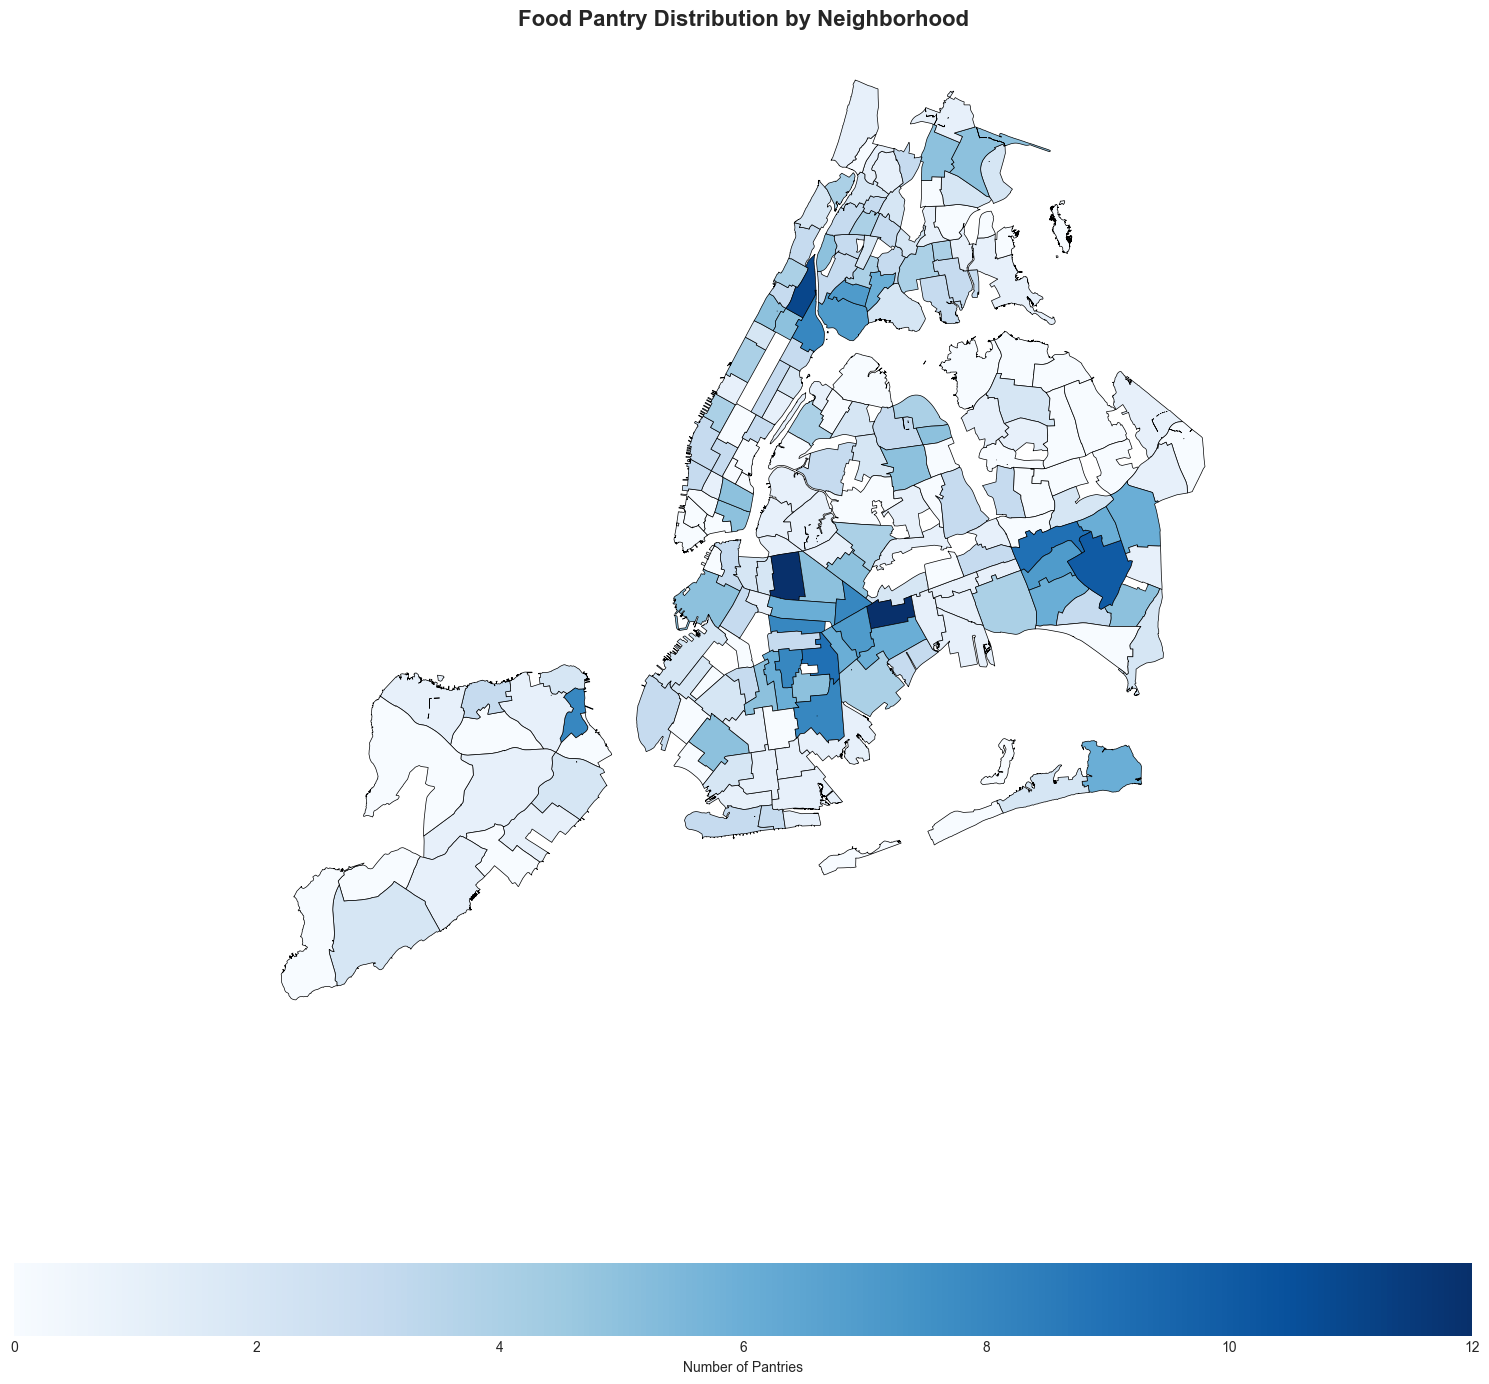


Pantry Count Statistics:
NTAs with 0 pantries: 44
NTAs with 1+ pantries: 153
Max pantries in one NTA: 12
Mean pantries per NTA: 2.61


In [57]:
fig, ax = plt.subplots(figsize=(15, 15))

# Plot pantry count
nta_geo.plot(column='pantry_count', ax=ax, legend=True, 
             cmap='Blues', edgecolor='black', linewidth=0.5,
             legend_kwds={'label': 'Number of Pantries', 'orientation': 'horizontal'})

ax.set_title('Food Pantry Distribution by Neighborhood', fontsize=16, fontweight='bold')
ax.axis('off')
plt.tight_layout()
plt.savefig('visuals/3_pantry_count_choropleth.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nPantry Count Statistics:")
print(f"NTAs with 0 pantries: {(nta_geo['pantry_count'] == 0).sum()}")
print(f"NTAs with 1+ pantries: {(nta_geo['pantry_count'] > 0).sum()}")
print(f"Max pantries in one NTA: {nta_geo['pantry_count'].max():.0f}")
print(f"Mean pantries per NTA: {nta_geo['pantry_count'].mean():.2f}")

---
# Summary Tables for Presentation

## Top 10 Deficit NTAs

In [58]:
# Get complete data from NTA table
nta_complete = nta_table.copy()
nta_complete['Supply Gap (lbs.)'] = pd.to_numeric(nta_complete['Supply Gap (lbs.)'], errors='coerce')

top_deficit = nta_complete.nsmallest(10, 'Supply Gap (lbs.)')[
    ['nta2020', 'ntaname', 'Supply Gap (lbs.)', 'Food Insecure Percentage', 'TotalPop', 'pantry_count']
].copy()

top_deficit['Supply Gap (lbs.)'] = top_deficit['Supply Gap (lbs.)'].apply(lambda x: f"{x:,.0f}")
top_deficit['TotalPop'] = top_deficit['TotalPop'].apply(lambda x: f"{x:,.0f}")
top_deficit.columns = ['NTA Code', 'Neighborhood', 'Supply Gap (lbs)', 'Food Insecurity %', 'Population', 'Pantries']

print("\n=== TOP 10 NEIGHBORHOODS WITH GREATEST DEFICIT ===")
print(top_deficit.to_string(index=False))


=== TOP 10 NEIGHBORHOODS WITH GREATEST DEFICIT ===
NTA Code                        Neighborhood Supply Gap (lbs)  Food Insecurity % Population  Pantries
  BK0101                          Greenpoint              nan              15.74     25,431         1
  BK0102                        Williamsburg              nan              16.48     52,985         1
  BK0103                  South Williamsburg              nan              27.58     34,945         1
  BK0104                   East Williamsburg              nan              21.34     40,952         1
  BK0201                    Brooklyn Heights              nan              10.05     23,839         0
  BK0202 Downtown Brooklyn-DUMBO-Boerum Hill              nan              15.69     22,439         3
  BK0203                         Fort Greene              nan              17.64     25,783         2
  BK0204                        Clinton Hill              nan              13.50     26,614         2
  BK0301           Bedford-Stu

## Top 10 Excess NTAs

In [59]:
top_excess = nta_complete.nlargest(10, 'Supply Gap (lbs.)')[
    ['nta2020', 'ntaname', 'Supply Gap (lbs.)', 'Food Insecure Percentage', 'TotalPop', 'pantry_count']
].copy()

top_excess['Supply Gap (lbs.)'] = top_excess['Supply Gap (lbs.)'].apply(lambda x: f"{x:,.0f}")
top_excess['TotalPop'] = top_excess['TotalPop'].apply(lambda x: f"{x:,.0f}")
top_excess.columns = ['NTA Code', 'Neighborhood', 'Supply Gap (lbs)', 'Food Insecurity %', 'Population', 'Pantries']

print("\n=== TOP 10 NEIGHBORHOODS WITH GREATEST EXCESS ===")
print(top_excess.to_string(index=False))


=== TOP 10 NEIGHBORHOODS WITH GREATEST EXCESS ===
NTA Code                        Neighborhood Supply Gap (lbs)  Food Insecurity % Population  Pantries
  BK0101                          Greenpoint              nan              15.74     25,431         1
  BK0102                        Williamsburg              nan              16.48     52,985         1
  BK0103                  South Williamsburg              nan              27.58     34,945         1
  BK0104                   East Williamsburg              nan              21.34     40,952         1
  BK0201                    Brooklyn Heights              nan              10.05     23,839         0
  BK0202 Downtown Brooklyn-DUMBO-Boerum Hill              nan              15.69     22,439         3
  BK0203                         Fort Greene              nan              17.64     25,783         2
  BK0204                        Clinton Hill              nan              13.50     26,614         2
  BK0301           Bedford-Stuy

## Summary Statistics by Borough

In [65]:
nta_geo['food_insecure_pct']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
192   NaN
193   NaN
194   NaN
195   NaN
196   NaN
Name: food_insecure_pct, Length: 197, dtype: float64

In [71]:
# Extract borough code from NTA code (first 2 characters)
nta_geo['borough_code'] = nta_geo['nta2020'].str[:2]

borough_map = {'BK': 'Brooklyn', 'BX': 'Bronx', 'MN': 'Manhattan', 'QN': 'Queens', 'SI': 'Staten Island'}
nta_geo['borough_name'] = nta_geo['borough_code'].map(borough_map)

borough_summary = nta_geo.groupby('borough_name').agg({
    'supply_gap': 'mean',
    'pantry_count': 'sum',
    'food_insecure_pct': 'mean',
    'nta2020': 'count'
}).round(2)

borough_summary.columns = ['Avg Supply Gap (lbs)', 'Total Pantries', 'Avg Food Insecurity %', 'Number of NTAs']
borough_summary['Avg Supply Gap (lbs)'] = borough_summary['Avg Supply Gap (lbs)'].apply(lambda x: f"{x:,.0f}")

print("\n=== SUMMARY BY BOROUGH ===")
print(borough_summary.to_string())


=== SUMMARY BY BOROUGH ===
              Avg Supply Gap (lbs)  Total Pantries  Avg Food Insecurity %  Number of NTAs
borough_name                                                                             
Bronx                      560,740              99                  24.26              37
Brooklyn                   248,428             181                  17.74              53
Manhattan                  873,391              88                  17.33              32
Queens                     196,599             124                  14.39              59
Staten Island              332,614              22                  13.05              16


## Overall Statistics

In [ ]:
print("\nAll visualizations have been saved to the 'visuals/' directory:")
print("\n=== DATA WORKFLOW (3 simple diagrams, one per section) ===")
print("  - 0a_workflow_section1.png (Data Cleaning)")
print("  - 0b_workflow_section2.png (Spatial Operations)")
print("  - 0c_workflow_section3.png (Analysis)")
print("\nSection 1: Data Standardization")
print("  - 1_nta_boundaries.png")
print("  - 1_pantry_locations.png")
print("\nSection 2: Spatial Operations")
print("  - 2_multilayer_map.png")
print("  - 2_before_after_dissolution.png")
print("  - 2_geocoding_success.png")
print("\nSection 3: Supply-Demand Analysis")
print("  - 3_food_insecurity_choropleth.png")
print("  - 3_supply_gap_classification.png")
print("  - 3_supply_gap_continuous.png")
print("  - 3_pantries_deficit_overlay.png")
print("  - 3_pantry_count_choropleth.png")
print("\n" + "="*60)
print("Total visualizations: 13 (3 workflow + 10 maps)")
print("="*60)

---
# Export High-Priority Visualizations

In [ ]:
print("\nAll visualizations have been saved to the 'visuals/' directory:")
print("\nSection 1: Data Standardization")
print("  - 1_nta_boundaries.png")
print("  - 1_pantry_locations.png")
print("\nSection 2: Spatial Operations")
print("  - 2_multilayer_map.png")
print("  - 2_before_after_dissolution.png")
print("  - 2_geocoding_success.png")
print("\nSection 3: Supply-Demand Analysis")
print("  - 3_food_insecurity_choropleth.png")
print("  - 3_supply_gap_classification.png")
print("  - 3_supply_gap_continuous.png")
print("  - 3_pantries_deficit_overlay.png")
print("  - 3_bivariate_analysis.png")
print("  - 3_pantry_count_choropleth.png")